In [1]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.7 MB/s 


##What's wrong with the data???

In [2]:
from google.colab import drive
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import keras_tuner as kt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

# Dataset Fixes

In [5]:
def get_data(dataset_number):
  with open("data{}.npz".format(dataset_number), "rb") as f:
    loaded_data = np.load(f)
    data = {}
    data["train_imgs"] = loaded_data['train_imgs']
    data["train_lbls"] = loaded_data['train_lbls']
    data["val_imgs"] = loaded_data['val_imgs']
    data["val_lbls"] = loaded_data['val_lbls']
    data["test_imgs"] = loaded_data['test_imgs']
    data["test_lbls"] = loaded_data['test_lbls']
    return data

In [6]:
def create_model(img_height=32, img_width=32, channels=3, num_classes=10):
  model = tf.keras.Sequential(
      [layers.InputLayer(input_shape=(img_height, img_width, channels)),
      layers.Conv2D(16, 5, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(32, 5, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(padding='same'),
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)     
      ]
  )

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [7]:
def run_model(data, epochs=20, batch_size=64):
  model = create_model()
  model.fit(x=data["train_imgs"], y=data["train_lbls"], validation_data=(data["val_imgs"], data["val_lbls"]), epochs=epochs, batch_size=batch_size)
  model.evaluate(x=data["test_imgs"], y=data["test_lbls"], batch_size=batch_size)

In [8]:
def plot_label_distribution(data):
  plt.rcParams['figure.figsize'] = [15, 5]
  plt.subplot(1,3,1)
  plt.hist(data["train_lbls"], bins=np.arange(11)-0.5, rwidth=0.9)
  plt.title("Train Labels")
  plt.subplot(1,3,2)
  plt.hist(data["val_lbls"], bins=np.arange(11)-0.5, rwidth=0.9)
  plt.title("Val Labels")
  plt.subplot(1,3,3)
  plt.hist(data["test_lbls"], bins=np.arange(11)-0.5, rwidth=0.9)
  plt.title("Test Labels")
  plt.show()

def plot_images_distribution(data):
  plt.rcParams['figure.figsize'] = [15, 5]
  plt.subplot(1,3,1)
  plt.hist(data["train_imgs"].reshape(-1))
  plt.title("Train Images")
  plt.subplot(1,3,2)
  plt.hist(data["val_imgs"].reshape(-1))
  plt.title("Val Images")
  plt.subplot(1,3,3)
  plt.hist(data["test_imgs"].reshape(-1))
  plt.title("Test Images")
  plt.show()

def print_dataset_numbers(data):
  print("Train Examples: {}\nVal Examples: {}\nTest Examples: {}".format(data["train_lbls"].shape[0], data["val_lbls"].shape[0], data["test_lbls"].shape[0]))
  print("Are all 50000 train examples used? {}".format(data["train_lbls"].shape[0] + data["val_lbls"].shape[0] >= 50000))
  print("Were there more than 50000 train examples used? {}".format(data["train_lbls"].shape[0] + data["val_lbls"].shape[0] > 50000))
  print("Are all 10000 test examples used? {}".format(data["test_lbls"].shape[0] == 10000))
  train_split = data["train_lbls"].shape[0] / (data["train_lbls"].shape[0] + data["val_lbls"].shape[0])
  val_split = data["val_lbls"].shape[0] / (data["train_lbls"].shape[0] + data["val_lbls"].shape[0])
  print("Train Split: {}, Val Split: {}".format(train_split, val_split))

def print_images_with_labels(data, n=5):
  data_parts = [("train_imgs", "train_lbls"), ("val_imgs", "val_lbls"), ("test_imgs", "test_lbls")]
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  for data_part in data_parts:
    for i in range(n):
      im_num = random.randint(0, data[data_part[0]].shape[0])
      plt.subplot(1,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(data[data_part[0]][im_num])
      plt.xlabel(class_names[data[data_part[1]][im_num]])
      if i == 2:
        plt.title(data_part[0])
    plt.show()

def count_doublicates(dataset1, dataset2):
  num_doublicates = 0
  for i in range(dataset1.shape[0]):
    for j in range(i+1, dataset2.shape[0]):
      if np.all(dataset1[i] == dataset2[j]):
        num_doublicates += 1
  return doublicates

def print_doublicates(data):
  print("Doublicates in the train set: " + count_doublicates(data["train_imgs"], data["train_imgs"]))
  print("Doublicates in the val set: " + count_doublicates(data["val_imgs"], data["val_imgs"]))
  print("Doublicates in the test set: " + count_doublicates(data["test_imgs"], data["test_imgs"]))

def print_disjunction(data):
  print("Disjunction between train set and val set" + count_doublicates(data["train_imgs"], data["val_imgs"]))
  print("Disjunction between train set and test set" + count_doublicates(data["train_imgs"], data["test_imgs"]))
  print("Disjunction between val set and test set" + count_doublicates(data["val_imgs"], data["test_imgs"]))



1. Do the labels match the examples?
2. Do the train, validation and test sets follow the same distribution?
3. Are the different subsets disjunct?
4. Are the sets balanced?
5. Were the sets processed in the same way?

* plot_label_distribution -> 2, 4
* plot_images_distribution -> 2
* print_dataset_numbers -> 3
* print_images_with_labels -> 1, 5
* intra_doublicates -> 4
* inter_doublicates -> 3



## Cifar 10

In [9]:
cifar_data = {}
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train.astype("int")
y_test.astype("int")

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

cifar_data["train_imgs"] = x_train
cifar_data["train_lbls"] = y_train
cifar_data["val_imgs"] = x_val
cifar_data["val_lbls"] = y_val
cifar_data["test_imgs"] = x_test
cifar_data["test_lbls"] = y_test

170508288/170498071 [==============================] - 2s 0us/step


In [10]:
model = create_model()
run_model(cifar_data)

Epoch 1/20
625/625 [==============================] - 23s 16ms/step - loss: 1.8569 - accuracy: 0.2711 - val_loss: 1.5451 - val_accuracy: 0.4230
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4384 - accuracy: 0.4685 - val_loss: 1.3338 - val_accuracy: 0.5091
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 1.2292 - accuracy: 0.5512 - val_loss: 1.1682 - val_accuracy: 0.5818
Epoch 4/20
625/625 [==============================] - 10s 15ms/step - loss: 1.1095 - accuracy: 0.5980 - val_loss: 1.1821 - val_accuracy: 0.5867
Epoch 5/20
625/625 [==============================] - 9s 14ms/step - loss: 1.0210 - accuracy: 0.6327 - val_loss: 1.0875 - val_accuracy: 0.6110
Epoch 6/20
625/625 [==============================] - 10s 15ms/step - loss: 0.9401 - accuracy: 0.6638 - val_loss: 1.0377 - val_accuracy: 0.6386
Epoch 7/20
625/625 [==============================] - 10s 15ms/step - loss: 0.8777 - accuracy: 0.6854 - val_loss: 1.0187 - val_accuracy: 

In [11]:
print_dataset_numbers(cifar_data)

Train Examples: 40000
Val Examples: 10000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.8, Val Split: 0.2


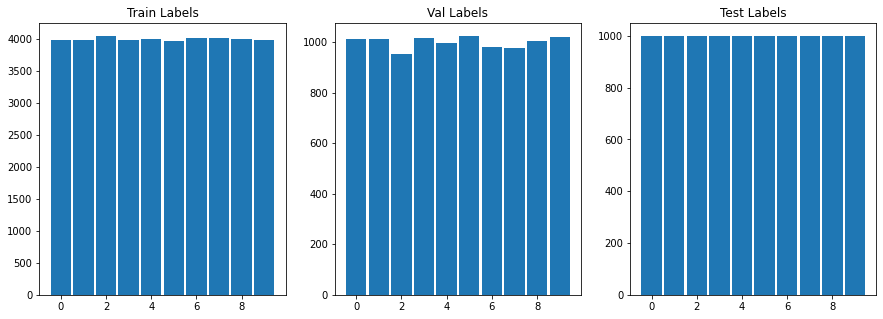

In [12]:
plot_label_distribution(cifar_data)

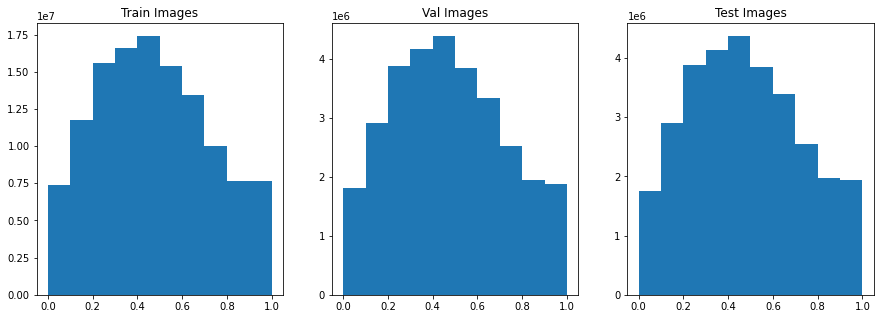

In [13]:
plot_images_distribution(cifar_data)

In [14]:
# print_images_with_labels(cifar_data)

## Data 1

In [15]:
data1 = get_data(1)

In [16]:
run_model(data1)

Epoch 1/20
563/563 [==============================] - 8s 13ms/step - loss: 1.6455 - accuracy: 0.3075 - val_loss: 1.3721 - val_accuracy: 0.4217
Epoch 2/20
563/563 [==============================] - 6s 11ms/step - loss: 1.2412 - accuracy: 0.5062 - val_loss: 1.1289 - val_accuracy: 0.5566
Epoch 3/20
563/563 [==============================] - 6s 11ms/step - loss: 1.0744 - accuracy: 0.5905 - val_loss: 1.0660 - val_accuracy: 0.6016
Epoch 4/20
563/563 [==============================] - 6s 11ms/step - loss: 0.9422 - accuracy: 0.6511 - val_loss: 0.9566 - val_accuracy: 0.6532
Epoch 5/20
563/563 [==============================] - 6s 11ms/step - loss: 0.8544 - accuracy: 0.6884 - val_loss: 0.8219 - val_accuracy: 0.7075
Epoch 6/20
563/563 [==============================] - 7s 12ms/step - loss: 0.7596 - accuracy: 0.7281 - val_loss: 0.8052 - val_accuracy: 0.7222
Epoch 7/20
563/563 [==============================] - 6s 11ms/step - loss: 0.6820 - accuracy: 0.7586 - val_loss: 0.7485 - val_accuracy: 0.7380

In [17]:
print_dataset_numbers(data1)

Train Examples: 36004
Val Examples: 3996
Test Examples: 10000
Are all 50000 train examples used? False
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.9001, Val Split: 0.0999


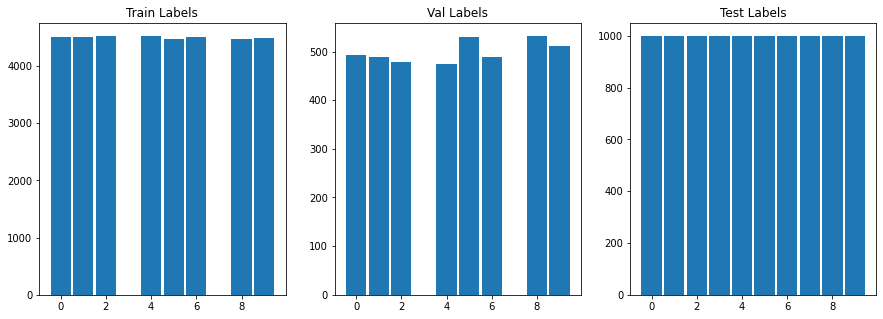

In [18]:
plot_label_distribution(data1)

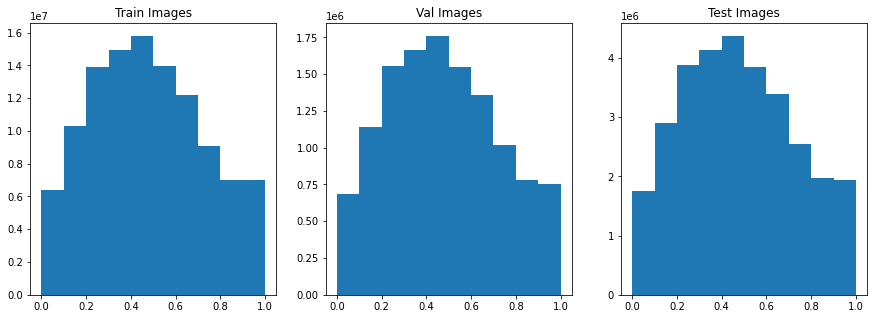

In [19]:
plot_images_distribution(data1)

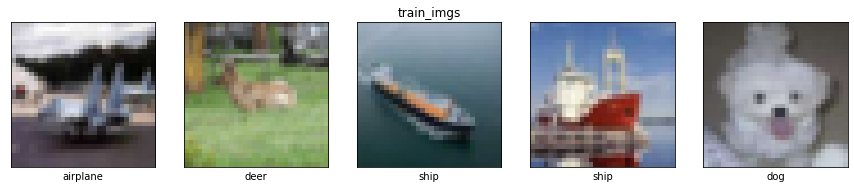

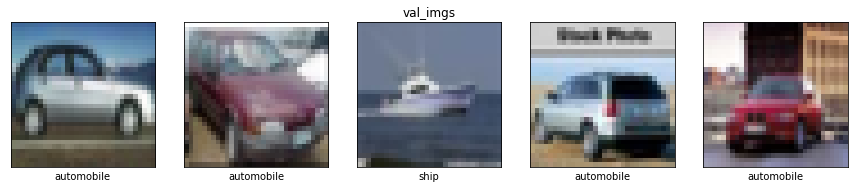

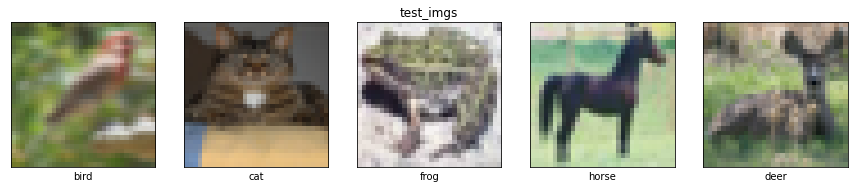

In [20]:
print_images_with_labels(data1)

Train and val set miss examples 3 and 7, because of this the test accuracy is worse than the train and val accuracy.  
The solution is added examples of this classes to the train and val set.  
This dataset represents problems, where the train and val set are a sample, which misses examples of some classes and therefore the model can't learn them.

## Data 2

In [21]:
data2 = get_data(2)

In [23]:
run_model(data2)

Epoch 1/20
782/782 [==============================] - 11s 13ms/step - loss: 1.7600 - accuracy: 0.3133 - val_loss: 1.4874 - val_accuracy: 0.4528
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 1.3673 - accuracy: 0.4968 - val_loss: 1.2542 - val_accuracy: 0.5362
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 1.1819 - accuracy: 0.5743 - val_loss: 1.0911 - val_accuracy: 0.6098
Epoch 4/20
782/782 [==============================] - 9s 12ms/step - loss: 1.0692 - accuracy: 0.6185 - val_loss: 1.0108 - val_accuracy: 0.6486
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 0.9703 - accuracy: 0.6538 - val_loss: 0.8631 - val_accuracy: 0.7008
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.8963 - accuracy: 0.6839 - val_loss: 0.7853 - val_accuracy: 0.7294
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 0.8320 - accuracy: 0.7091 - val_loss: 0.7417 - val_accuracy: 0.740

In [24]:
print_dataset_numbers(data2)

Train Examples: 50000
Val Examples: 5000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? True
Are all 10000 test examples used? True
Train Split: 0.9090909090909091, Val Split: 0.09090909090909091


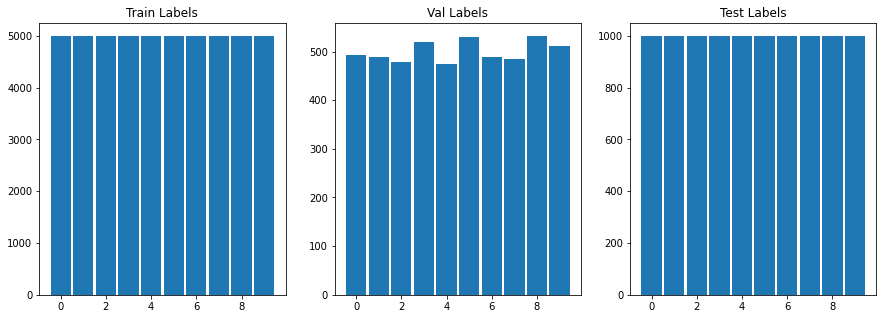

In [25]:
plot_label_distribution(data2)

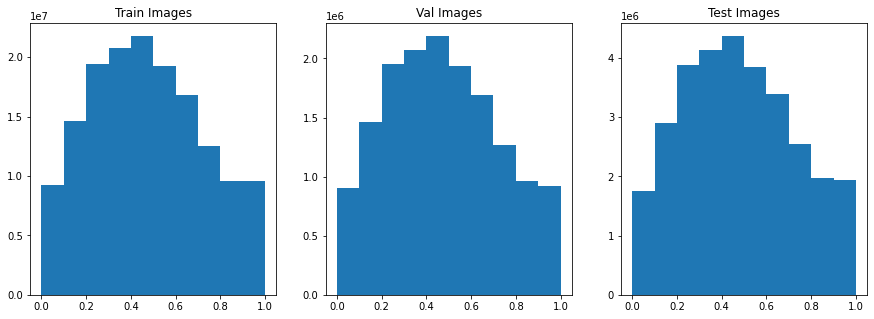

In [26]:
plot_images_distribution(data2)

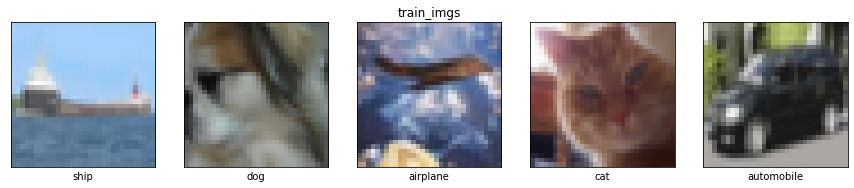

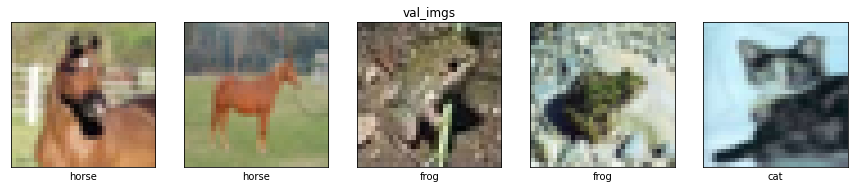

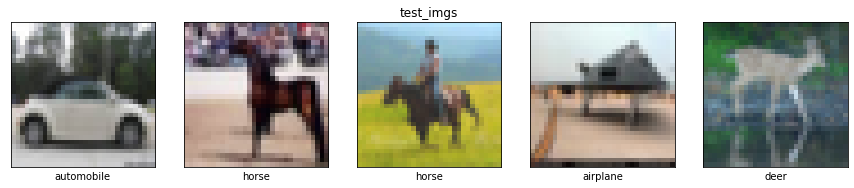

In [30]:
print_images_with_labels(data2)

The val set is not disjunct with the train set. The val set is better than usual, train and test accuracy are usual.  
The solution is to remove the val examples from the train set.  
This dataset represents problems, where the train and validation and even test set overlap.

## Data 3

In [31]:
data3 = get_data(3)

In [32]:
run_model(data3)

Epoch 1/20
704/704 [==============================] - 10s 13ms/step - loss: 1.7721 - accuracy: 0.3138 - val_loss: 1.4636 - val_accuracy: 0.4594
Epoch 2/20
704/704 [==============================] - 8s 11ms/step - loss: 1.3868 - accuracy: 0.4851 - val_loss: 1.3333 - val_accuracy: 0.5254
Epoch 3/20
704/704 [==============================] - 8s 11ms/step - loss: 1.2005 - accuracy: 0.5629 - val_loss: 1.1356 - val_accuracy: 0.5988
Epoch 4/20
704/704 [==============================] - 8s 11ms/step - loss: 1.0600 - accuracy: 0.6216 - val_loss: 1.1405 - val_accuracy: 0.5880
Epoch 5/20
704/704 [==============================] - 8s 11ms/step - loss: 0.9706 - accuracy: 0.6558 - val_loss: 1.0195 - val_accuracy: 0.6452
Epoch 6/20
704/704 [==============================] - 8s 11ms/step - loss: 0.8934 - accuracy: 0.6838 - val_loss: 0.9968 - val_accuracy: 0.6652
Epoch 7/20
704/704 [==============================] - 8s 11ms/step - loss: 0.8267 - accuracy: 0.7069 - val_loss: 0.9517 - val_accuracy: 0.676

In [33]:
print_dataset_numbers(data3)

Train Examples: 45000
Val Examples: 5000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.9, Val Split: 0.1


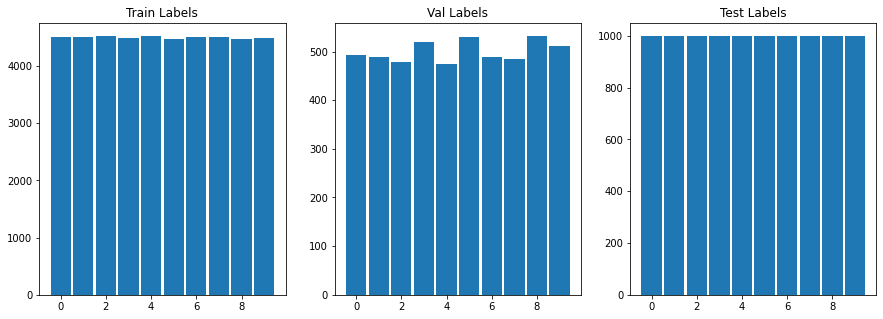

In [34]:
plot_label_distribution(data3)

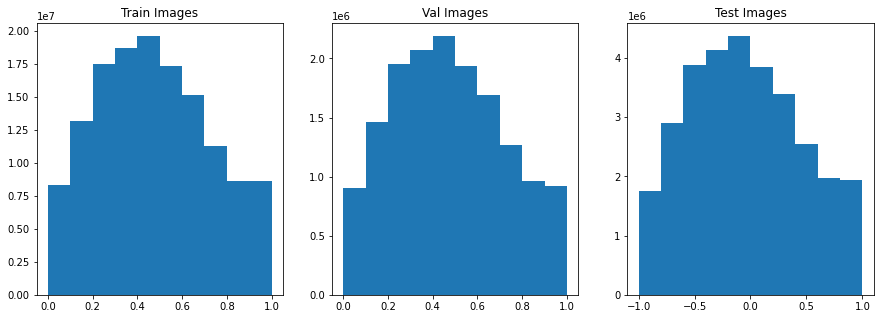

In [35]:
plot_images_distribution(data3)

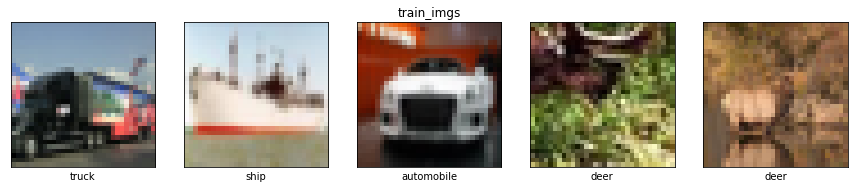

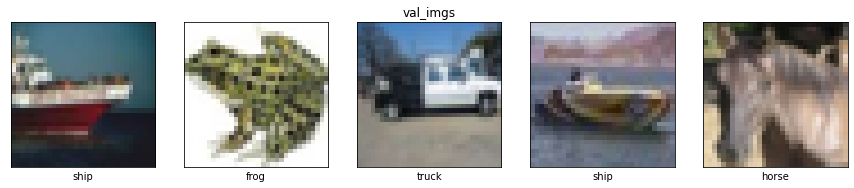

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


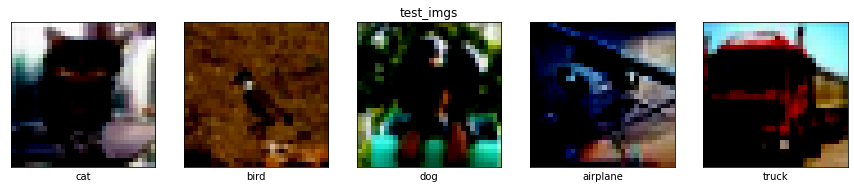

In [36]:
print_images_with_labels(data3)

The test images have negative pixels, because of that the test accuracy is low. Train and val accuracy are usual.  
A solution could be to clip the test examples or better to find the problem at the data (generation) e.g. color values are correct, just with a wrong sign and correct it.  
This dataset represents problems, where the generation or preprocessing has errors.

## Data 4

# New Section

In [37]:
data4 = get_data(4)

In [38]:
run_model(data4)

Epoch 1/20
704/704 [==============================] - 9s 12ms/step - loss: 0.0971 - accuracy: 0.9635 - val_loss: 2.4080e-06 - val_accuracy: 1.0000
Epoch 2/20
704/704 [==============================] - 8s 12ms/step - loss: 1.2558e-06 - accuracy: 1.0000 - val_loss: 6.5565e-07 - val_accuracy: 1.0000
Epoch 3/20
704/704 [==============================] - 8s 11ms/step - loss: 4.3409e-07 - accuracy: 1.0000 - val_loss: 2.7418e-07 - val_accuracy: 1.0000
Epoch 4/20
704/704 [==============================] - 8s 11ms/step - loss: 1.9202e-07 - accuracy: 1.0000 - val_loss: 1.3113e-07 - val_accuracy: 1.0000
Epoch 5/20
704/704 [==============================] - 8s 11ms/step - loss: 1.0727e-07 - accuracy: 1.0000 - val_loss: 8.3446e-08 - val_accuracy: 1.0000
Epoch 6/20
704/704 [==============================] - 8s 11ms/step - loss: 5.8397e-08 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 7/20
704/704 [==============================] - 8s 11ms/step - loss: 3.5588e-08 - accuracy: 

In [39]:
print_dataset_numbers(data4)

Train Examples: 45000
Val Examples: 5000
Test Examples: 10000
Are all 50000 train examples used? True
Were there more than 50000 train examples used? False
Are all 10000 test examples used? True
Train Split: 0.9, Val Split: 0.1


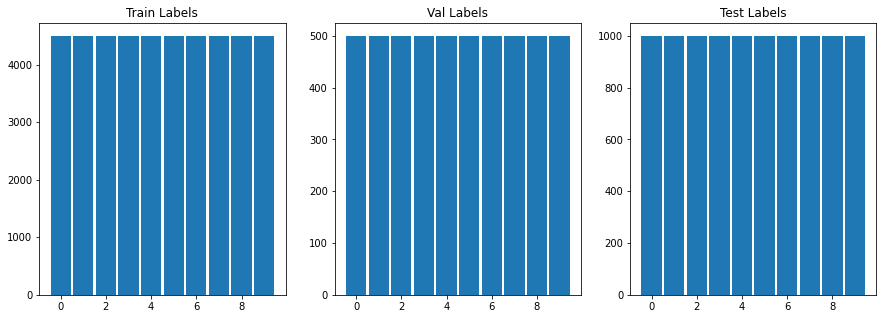

In [40]:
plot_label_distribution(data4)

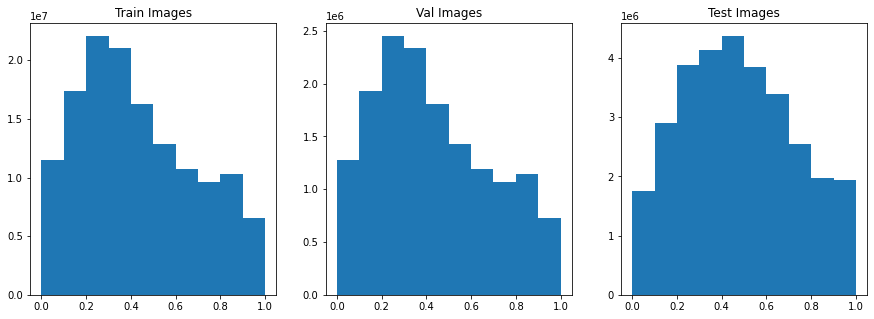

In [41]:
plot_images_distribution(data4)

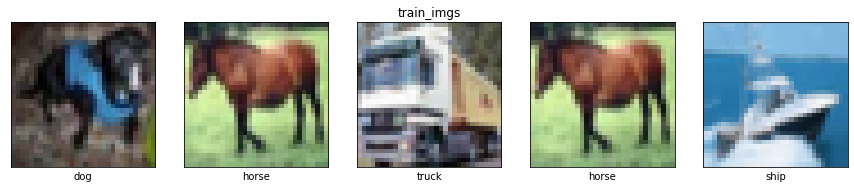

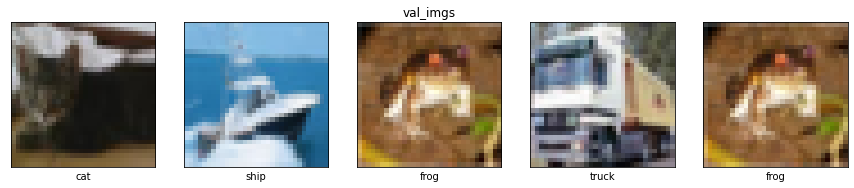

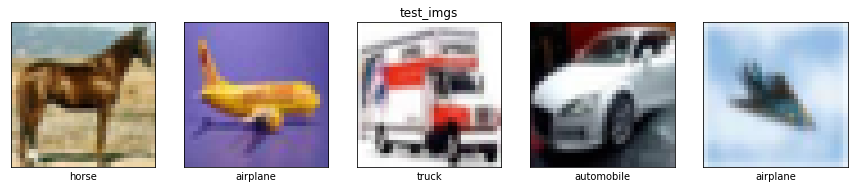

In [42]:
print_images_with_labels(data4)

The train and val set contain few pictures very often, the model overfitts to this pictures, the train and val accuracy is early high, but the test accuracy is that of random guessing.  
The problem can be solved, by getting a train and val set without doublicates and with more examples.  
This problem represents doublicated examples at a dataset

# Practical Methodology

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

input_layer = tf.keras.Input(shape=(32, 32, 3))

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.densenet.preprocess_input

dense_net = tf.keras.applications.densenet.DenseNet121(include_top=False, weights="imagenet", input_shape=(32,32,3))
dense_net.trainabel = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

29097984/29084464 [==============================] - 0s 0us/step


In [44]:
def model_builder(hp):
  inputs = tf.keras.Input(shape=(32, 32, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = dense_net(x, training=False)
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  x = keras.layers.Dense(units=hp_units, activation='relu')(x)
  outputs = keras.layers.Dense(10)(x)

  model = tf.keras.Model(inputs, outputs)

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [45]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir2',
                     project_name='intro_to_kt2')
# patience: Number of epochs with no improvement after which training will be stopped.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [46]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 17 Complete [00h 12m 50s]
val_accuracy: 0.7555000185966492

Best val_accuracy So Far: 0.802299976348877
Total elapsed time: 01h 26m 17s

Search: Running Trial #18

Hyperparameter    |Value             |Best Value So Far 
units             |352               |64                
learning_rate     |1e-05             |1e-05             
tuner/epochs      |10                |2                 
tuner/initial_e...|4                 |0                 
tuner/bracket     |2                 |2                 
tuner/round       |2                 |0                 
tuner/trial_id    |a9f60025793c5c4...|None              

Epoch 5/10
 450/1250 [=========>....................] - ETA: 1:15 - loss: 1.5838 - accuracy: 0.5095

KeyboardInterrupt: ignored

Took 3 hours, expensive but could be cheaper than trying hyperparameters out.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

train accuracy is very good, val and test accuracy are worse. Adding the val set to the training set could help, since no early stopping or scheduler that uses the val accuracy is used.

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

Train accuracy is a little bit worse and the test accuracy a little bit better.  
Another dropout layer could reduce the test error more.

In [ ]:
def model_with_hp():
  inputs = tf.keras.Input(shape=(32, 32, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = dense_net(x, training=False)
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(units=416, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  outputs = keras.layers.Dense(10)(x)

  model = tf.keras.Model(inputs, outputs)

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

hypermodel = model_with_hp()

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

Train and Test accuracy a little bit better, but not significantly.